# Lily Yao

## Research question/interests

We are planning on analyzing the effects the growing demand for fish and seafood has on climate change. The ever growing demand resulted in growing development for both global fish and seafood production or wild capturing to meet this demand. But how does this affect climate change? With the ever growing demand will the wild fish stock be able to keep up with overfishing?   

Additionally, we would like to delve further into how technology can be used to aid in the effects of overfishing via aquaculture and seafood farming. Lastly, we would like to look into the extent of each country/region's overfishing trends and compare it to the their production trends.  

In [1]:
## Importing the dataset

import numpy as np
import pandas as pd

aquaculture = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
capturedVsAquaculture= pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
captured = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fishery-production.csv", sep=",")
seafoodConsumptionpercapita = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-and-seafood-consumption-per-capita.csv", sep=",")
sustainableFishStocks = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")
globalFisheryBySector = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/global-fishery-catch-by-sector.csv", sep=",")
seafoodProduction = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/seafood-and-fish-production-thousand-tonnes.csv", sep=",")

captured.head()


,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0


## Milestone 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
%matplotlib inline

## import the data and check different aspects of the data
df1 = globalFisheryBySector
print(df1.shape)
print(df1.head())
print(df1.columns)
print(df1.info())

##As my question pertains to the results of overfishing impact our wild fish stock over the next decade there are a few columns that are unecessary
## Clean up the data and drop certain unecessary columns
df1_cleaned = df1.copy().drop(['Code'],axis=1)



(61, 8)
  Entity      Code  Year  Artisanal (small-scale commercial)  Discards  \
0  World  OWID_WRL  1950                             7526795   5874170   
1  World  OWID_WRL  1951                             8278304   6278225   
2  World  OWID_WRL  1952                             8272109   7230311   
3  World  OWID_WRL  1953                             8469284   7172937   
4  World  OWID_WRL  1954                             9226926   8012930   

   Industrial (large-scale commercial)  Recreational  Subsistence  
0                             14566338        268260      2677833  
1                             15417937        284319      2704471  
2                             16463942        293558      2728141  
3                             17163789        292070      2753098  
4                             18340199        304398      2895153  
Index(['Entity', 'Code', 'Year', 'Artisanal (small-scale commercial)',
       'Discards', 'Industrial (large-scale commercial)', 'Recreatio

In [3]:
## Check for any null columns
if df1_cleaned.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df1_cleaned[df1_cleaned.isnull().any(axis=1)].head(3))
    missingno.matrix(df1)
    plt.show()

In [4]:
## Drop any null columns
df1_cleaned = df1_cleaned.dropna(axis=0)
df1_cleaned.shape

(61, 7)

In [5]:
## Describe the data in a visual table
df1_cleaned.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,61.0,1.980000e+03,1.775293e+01,1950.0,1965.0,1980.0,1995.0,2010.0
Artisanal (small-scale commercial),61.0,1.518018e+07,4.255916e+06,7526795.0,11653978.0,14688464.0,19665232.0,21828623.0
Discards,61.0,1.183483e+07,2.601006e+06,5874170.0,10014530.0,11712961.0,13595692.0,16962727.0
Industrial (large-scale commercial),61.0,5.949119e+07,2.424154e+07,14566338.0,41475194.0,62459956.0,80593708.0,90068159.0
Recreational,61.0,6.099268e+05,1.941205e+05,268260.0,405857.0,731511.0,769491.0,849021.0
Subsistence,61.0,3.777210e+06,4.167156e+05,2677833.0,3630156.0,3911536.0,4072844.0,4226487.0


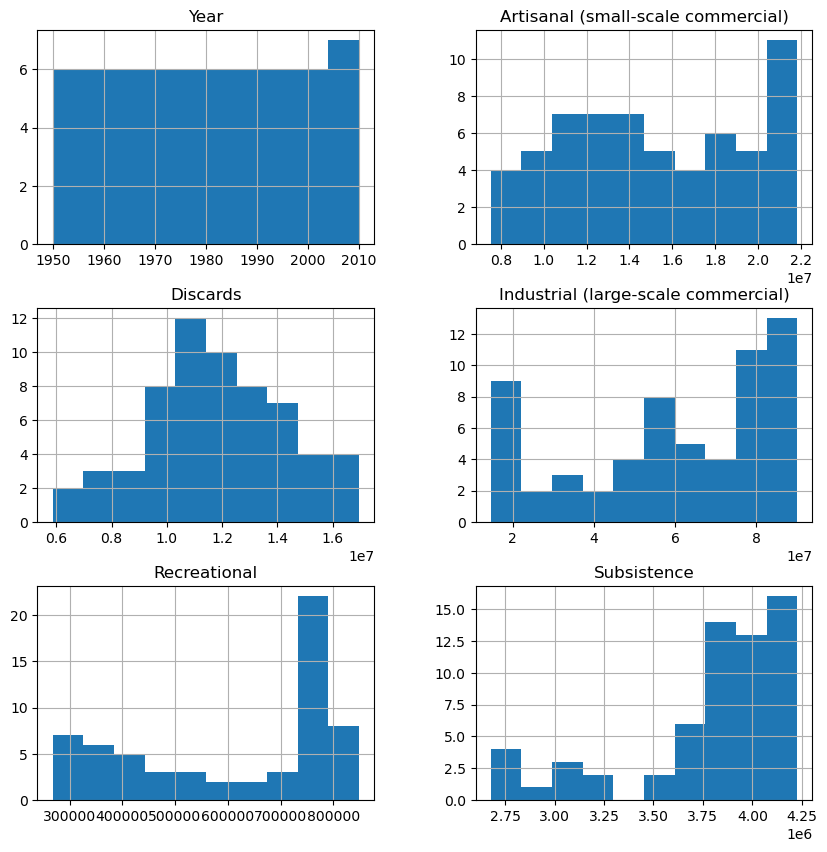

In [33]:
## Visual histogram of the data
hist1 = df1_cleaned.hist(bins=10,figsize =(10,10))


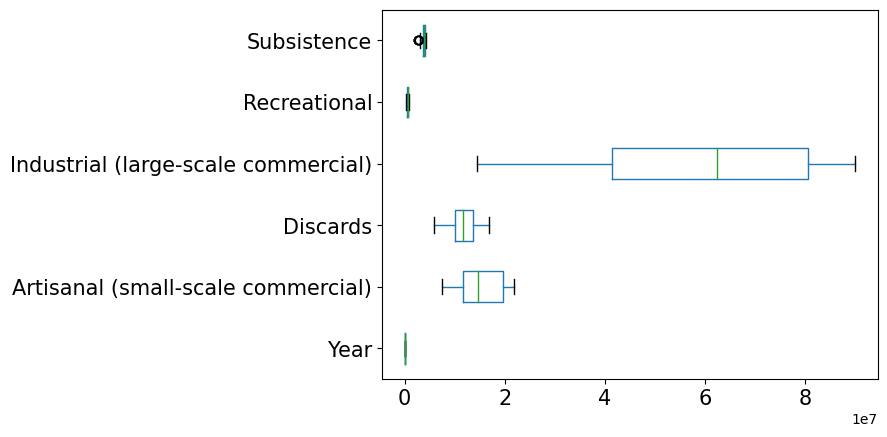

In [34]:
## Boxplot of the data 
boxplot = df1_cleaned.boxplot(grid=False, vert=False,fontsize=15)

In [6]:
## Importing the second datatset
df2 = sustainableFishStocks
print(df2.shape)
print(df2.head())
print(df2.columns)
print(df2.info())

## Droping unnecessary columns
## I will remove the unnecessary columns that do not pertain to my research question
df2_cleaned = df2.copy().drop(['Code'],axis=1)



(51, 5)
                     Entity Code  Year  \
0  Eastern Central Atlantic  NaN  2015   
1  Eastern Central Atlantic  NaN  2017   
2   Eastern Central Pacific  NaN  2015   
3   Eastern Central Pacific  NaN  2017   
4      Eastern Indian Ocean  NaN  2015   

   Share of fish stocks within biologically sustainable levels (FAO, 2020)  \
0                                          57.142860                         
1                                          57.142857                         
2                                          86.666670                         
3                                          86.666667                         
4                                          73.076920                         

   Share of fish stocks that are overexploited  
0                                    42.857140  
1                                    42.857143  
2                                    13.333330  
3                                    13.333333  
4                        

In [7]:
## Checking for any null columns
if df2_cleaned.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df2_cleaned[df2_cleaned.isnull().any(axis=1)].head(3))
    missingno.matrix(df2_cleaned)
    plt.show()

In [8]:
## Dropping any null columns
df2_cleaned = df2_cleaned.dropna(axis=0)
df2_cleaned.shape


(51, 4)

In [9]:
## Displaying the data in a visual table
df2_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,51.0,2007.705882,13.150352,1974.000000,2002.000000,2015.00000,2017.000000,2017.000000
"Share of fish stocks within biologically sustainable levels (FAO, 2020)",51.0,70.521579,13.885635,37.500000,66.257862,73.07692,81.843157,91.463415
Share of fish stocks that are overexploited,51.0,29.478421,13.885635,8.536585,18.156843,26.92308,33.742138,62.500000


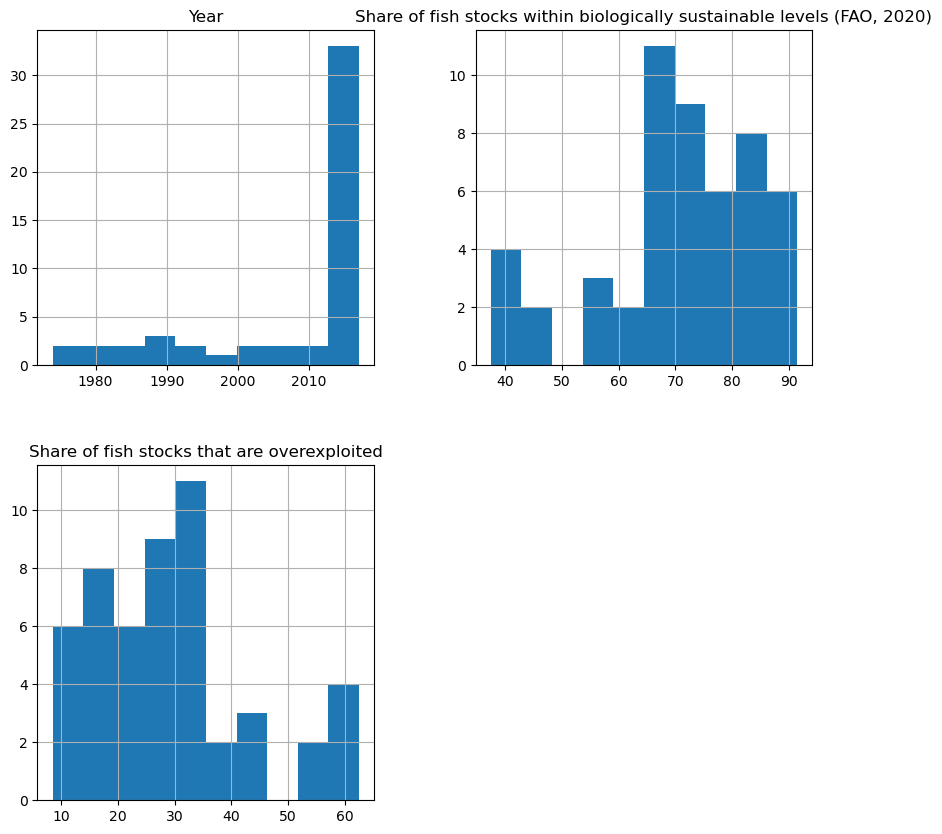

In [26]:
## Displaying the data in a histogram
hist2 = df2_cleaned.hist(bins=10,figsize =(10,10))


In [ ]:
df2_cleaned

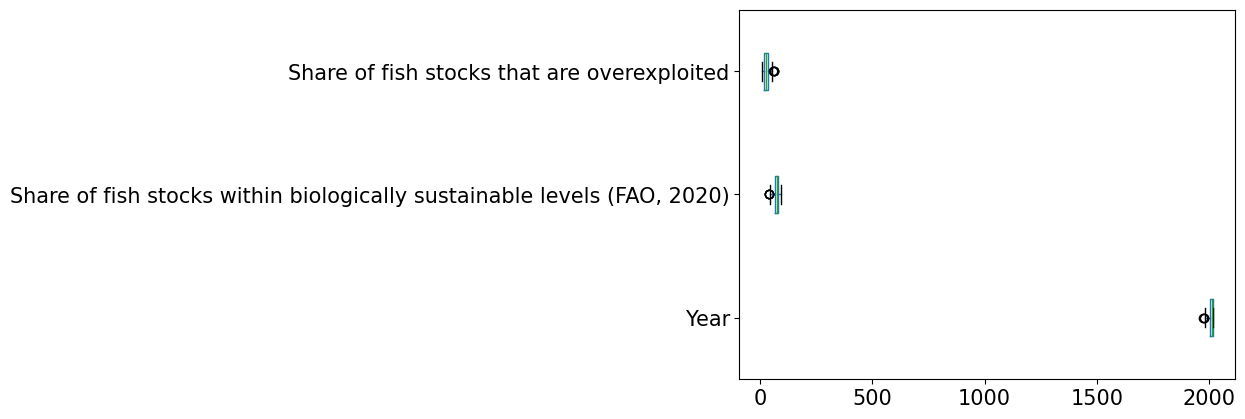

In [15]:
## Displaying the data in a visual boxplot
boxplot2 = df2_cleaned.boxplot(grid=False, vert=False,fontsize=15)

In [26]:
## Method Chaining for first df(df1_cleaned)
import pandas as pd
import numpy as np

def load_and_process_df1(url):
    
    df1 = pd.read_csv(url, sep=',')
    df1_1 = {
        df1.copy()
        .dropna(axis=0)
        .rename(columns={"Artisanal" : "Normal Fishing", "Subsistence": "Fishing for Survival"})
        .sort_values("Year", ascending=False)
        .reset_index(drop=True)
    }
    df1_2 = {
        df1_1
        .drop(['Entity','Code'],axis=1)
        .drop_duplicates(inplace=True)

    }
    return df1_2
load_and_process_df1('../data/raw/global-fishery-catch-by-sector.csv')

,Year,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence
0,1950,7526795,5874170,14566338,268260,2677833
1,1951,8278304,6278225,15417937,284319,2704471
2,1952,8272109,7230311,16463942,293558,2728141
3,1953,8469284,7172937,17163789,292070,2753098
4,1954,9226926,8012930,18340199,304398,2895153
...,...,...,...,...,...,...
56,2006,21417851,9530758,78480816,790270,3792749
57,2007,21097388,9725492,78861788,804477,3623797
58,2008,21111836,9568906,76840638,826843,3629819
59,2009,21828623,9369530,75728150,805632,3630156


In [27]:
def load_and_process_df2(url):
    df = pd.read_csv(url, sep=',')
    
    df2_1 = {
        df.copy()
        .dropna(axis=0)
        .rename(columns={"Entity" : "Location"})
        .sort_values("Year", ascending=False)
        .reset_index(drop=True)
    }
    
    df2_2 = {
        df2_1.copy()
        .drop(['Code'],axis=1)
        .drop_duplicates(inplace=True)

    }
    
    return df2_2
load_and_process_df1('../data/raw/fish-stocks-within-sustainable-levels.csv')

,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,2015,57.142860,42.857140
1,2017,57.142857,42.857143
2,2015,86.666670,13.333330
3,2017,86.666667,13.333333
4,2015,73.076920,26.923080
5,2017,68.627451,31.372549
6,2015,37.837840,62.162160
7,2017,37.500000,62.500000
8,2015,73.469390,26.530610
9,2017,79.310345,20.689655


In [28]:
import project_functions_lily as pl
cleaned_df1 = pl.load_and_process_df1('../data/raw/global-fishery-catch-by-sector.csv')
cleaned_df1



,Year,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence
0,1950,7526795,5874170,14566338,268260,2677833
1,1951,8278304,6278225,15417937,284319,2704471
2,1952,8272109,7230311,16463942,293558,2728141
3,1953,8469284,7172937,17163789,292070,2753098
4,1954,9226926,8012930,18340199,304398,2895153
...,...,...,...,...,...,...
56,2006,21417851,9530758,78480816,790270,3792749
57,2007,21097388,9725492,78861788,804477,3623797
58,2008,21111836,9568906,76840638,826843,3629819
59,2009,21828623,9369530,75728150,805632,3630156


In [29]:
cleaned_df2 = pl.load_and_process_df2('../data/raw/fish-stocks-within-sustainable-levels.csv')
cleaned_df2

,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,2015,57.142860,42.857140
1,2017,57.142857,42.857143
2,2015,86.666670,13.333330
3,2017,86.666667,13.333333
4,2015,73.076920,26.923080
5,2017,68.627451,31.372549
6,2015,37.837840,62.162160
7,2017,37.500000,62.500000
8,2015,73.469390,26.530610
9,2017,79.310345,20.689655


Check group analysis for the analysis part

In [9]:
df1_cleaned.to_csv('lily_Global_fish.csv')

In [10]:
df2_cleaned.to_csv('lily_Sustain_fish.csv')